In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
    
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import BatchNormalization

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


# Data Head

In [5]:
df = pd.read_csv("../input/heartbeat/mitbih_test.csv", header = None, index_col = False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df[187].unique()

array([0., 1., 2., 3., 4.])

In [7]:
type_a = ["Non Ectopic beats (Normal beats)",'Supraventrical ectopic beats',"Ventricular ectopic beats",'Fusion beats','Unknown beats']
df.loc[df[187] == 0, 'name_match'] = type_a[0]  
df.loc[df[187] == 1, 'name_match'] = type_a[1]
df.loc[df[187] == 2, 'name_match'] = type_a[2]
df.loc[df[187] == 3, 'name_match'] = type_a[3]  
df.loc[df[187] == 3, 'name_match'] = type_a[4]  

# EDA

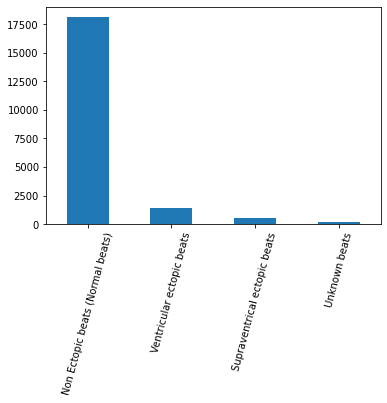

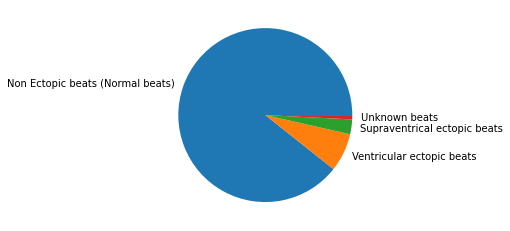

In [8]:
df['name_match'].value_counts().plot(kind = 'bar', rot = 75)
plt.show()
df['name_match'].value_counts().plot(kind = 'pie', ylabel = "")
plt.show()

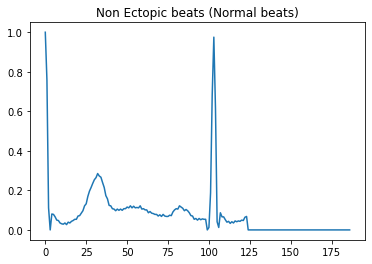

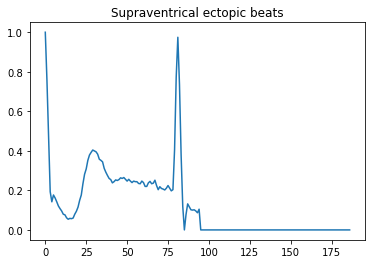

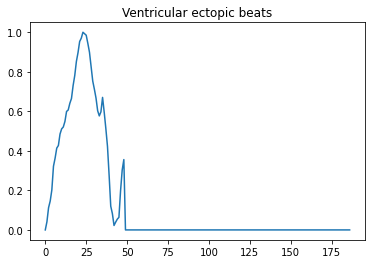

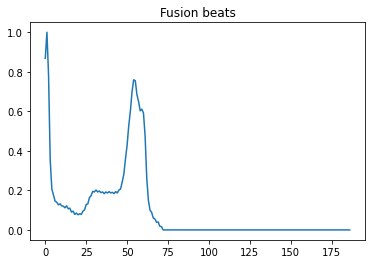

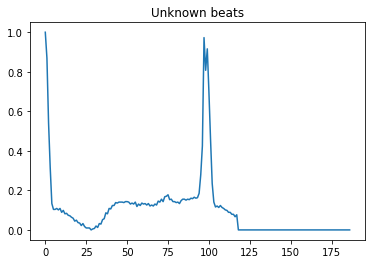

In [36]:
cond = df[187].unique()
type_a = ["Non Ectopic beats (Normal beats)",'Supraventrical ectopic beats',"Ventricular ectopic beats",'Fusion beats','Unknown beats']
for a in cond:
    df1 = df[df[187] == a].head(1)
    aa = df1.loc[:,0:186].to_numpy()
    xx = np.arange(0,187)
    plt.plot(xx,aa[0])
    plt.title(type_a[int(a)])
    plt.show()

In [37]:
x = df.loc[:,0:186]
y = df.loc[:,187]

# Neural Network

In [38]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x,dummy_y, test_size=0.01, random_state=42)

In [40]:
batchnorm_model = Sequential()
# Add the first layer
batchnorm_model.add(Dense(50, activation='sigmoid',input_shape=(187,), kernel_initializer='normal'))
batchnorm_model.add(Dense(50, activation='sigmoid', kernel_initializer='normal'))
batchnorm_model.add(Dense(50, activation='sigmoid', kernel_initializer='normal'))
batchnorm_model.add(Dense(50, activation='sigmoid', kernel_initializer='normal'))
batchnorm_model.add(Dense(5, activation='softmax', kernel_initializer='normal'))

In [41]:
# Compile your model with sgd
batchnorm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

In [42]:
preds = batchnorm_model.predict(X_test)
preds_rounded = np.round(preds)
preds
accuracy2 = batchnorm_model.evaluate(X_test, y_test)
accuracy2[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9726


0.9726027250289917

In [46]:
batchnorm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 50)                9400      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 255       
Total params: 17,305
Trainable params: 17,305
Non-trainable params: 0
_________________________________________________________________


In [47]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(preds, axis = 1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       182
           1       0.00      0.00      0.00         3
           2       0.85      1.00      0.92        17
           4       1.00      1.00      1.00        17

    accuracy                           0.97       219
   macro avg       0.71      0.75      0.73       219
weighted avg       0.96      0.97      0.97       219



## Test Dataset

In [50]:
df1 = pd.read_csv("../input/heartbeat/mitbih_test.csv", header = None, index_col = False)
x_test1 = df1.loc[:,0:186]
y_test1 = df1.loc[:,187]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test1)
encoded_Y = encoder.transform(y_test1)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)
dummy_y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [51]:
accuracy_test = batchnorm_model.evaluate(x_test1, dummy_y_test)
preds_1 = batchnorm_model.predict(x_test1)
print(classification_report(np.argmax(dummy_y_test, axis=1), np.argmax(preds_1, axis = 1)))

685/685 [==============================] - 1s 1ms/step - loss: 0.2725 - accuracy: 0.9334
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18118
           1       0.00      0.00      0.00       556
           2       0.74      0.81      0.77      1448
           3       0.00      0.00      0.00       162
           4       0.97      0.83      0.90      1608

    accuracy                           0.93     21892
   macro avg       0.53      0.53      0.53     21892
weighted avg       0.90      0.93      0.92     21892



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Wrong Predictions Analysis

In [52]:
ch1 = pd.DataFrame(np.rint(preds_1))
ch1.head()

ch1.loc[ch1[0] == 1.0 , 'pred'] = 0  
ch1.loc[ch1[1] == 1.0, 'pred'] = 1  
ch1.loc[ch1[2] == 1.0, 'pred'] = 2  
ch1.loc[ch1[3] == 1.0, 'pred'] = 3  
ch1.loc[ch1[4] == 1.0, 'pred'] = 4  
ch1.loc[(ch1[1] == 0) & (ch1[2] == 0) & (ch1[3] == 0) & (ch1[4] == 0), 'pred'] = 0
ch1.pred

df1_test = pd.concat([df1,ch1['pred']],axis = 1)

df1_test['compare'] = np.where(df1_test['pred']==df1_test[187], 
                                           'yes', 'no')

In [53]:
df1_test_1 = df1_test[df1_test["compare"]=='no']
df1_test_1.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,pred,compare
100,0.058111,0.116223,0.239709,0.537530,0.523002,0.486683,0.636804,0.799031,0.639225,0.748184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no
301,0.751984,0.619048,0.521825,0.384921,0.283730,0.200397,0.146825,0.134921,0.113095,0.128968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no
345,0.674185,0.602757,0.382206,0.136591,0.036341,0.013784,0.003759,0.003759,0.001253,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no
584,0.000000,0.158451,0.179577,0.285211,0.281690,0.327465,0.267606,0.316901,0.267606,0.288732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no
704,0.000000,0.016304,0.190217,0.233696,0.250000,0.239130,0.277174,0.266304,0.304348,0.282609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no


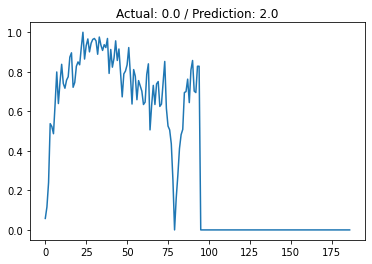

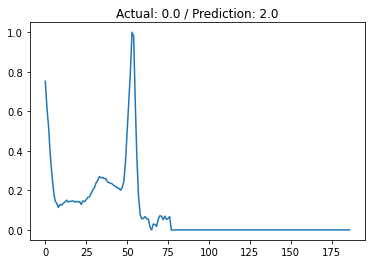

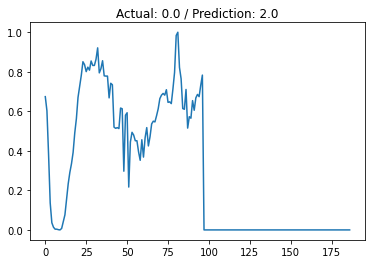

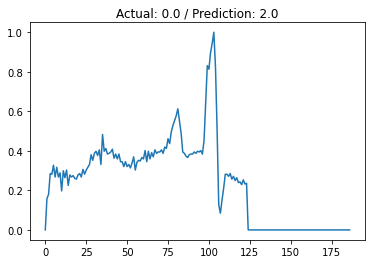

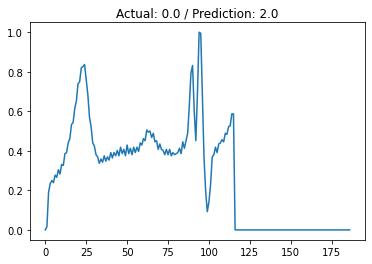

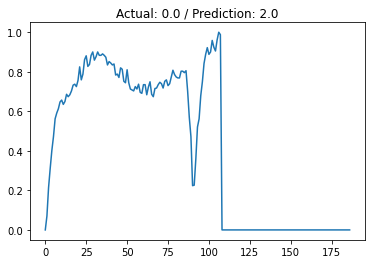

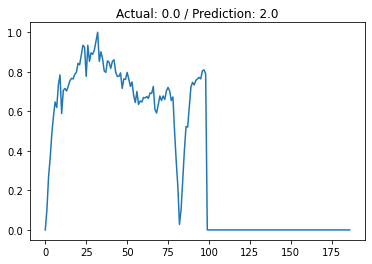

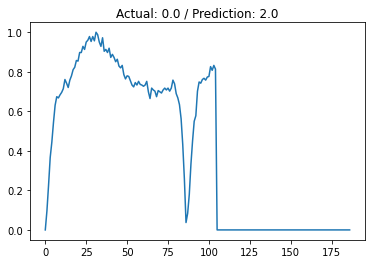

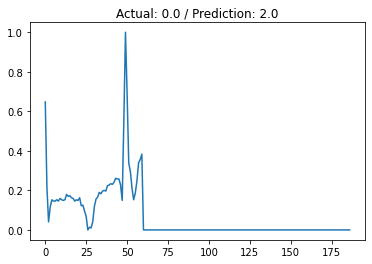

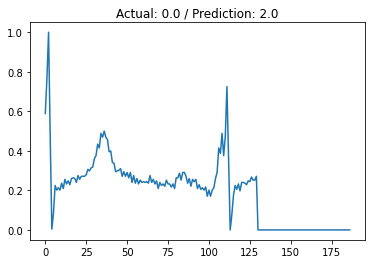

In [54]:
for i in range(10):
    aa = df1_test_1.loc[:,0:186].to_numpy()
    aa1 =
    df1_test_1.loc[:,187:'pred'].to_numpy()
    xx = np.arange(0,187)
    plt.plot(xx,aa[i])
    plt.title("Actual: {} / Prediction: {}".format(aa1[i][0],aa1[i][1]))
    plt.show()